In [1]:
from quality_metrics import (
    angular_resolution,
    aspect_ratio,
    crossing_angle,
    crossing_number,
    gabriel_graph_property,
    ideal_edge_length,
    node_resolution,
    run_time,
    shape_based_metrics,
    stress,
)


edge_weight = 30

# d = "USpowerGrid"
d = 'les_miserables'
# l = "SS"
l = 'FR'

dataset_path = f"lib/egraph-rs/js/dataset/{d}.json"

# study_name = "ideal_edge_length,run_time,stress"
# study_name = "crossing_number,ideal_edge_length,run_time,shape_based_metrics,stress"
study_name = 'angular_resolution,aspect_ratio,crossing_angle,ideal_edge_length,node_resolution,run_time,shape_based_metrics,stress'


targets = study_name.split(",")
database_uri = f"sqlite:///db/opt/{l}/{d}/{study_name}.db"


QUALITY_METRICS = {
    "angular_resolution": angular_resolution,
    "aspect_ratio": aspect_ratio,
    "crossing_angle": crossing_angle,
    "crossing_number": crossing_number,
    "gabriel_graph_property": gabriel_graph_property,
    "ideal_edge_length": ideal_edge_length,
    "node_resolution": node_resolution,
    "run_time": run_time,
    "shape_based_metrics": shape_based_metrics,
    "stress": stress,
}

ALL_QUALITY_METRICS_NAMES = sorted([name for name in QUALITY_METRICS])

In [2]:
import networkx as nx
import json
from utils.graph import graph_preprocessing


with open(dataset_path) as f:
    graph_data = json.load(f)
nx_graph = graph_preprocessing(nx.node_link_graph(graph_data), edge_weight)


In [3]:
import optuna

study = optuna.load_study(
    study_name=study_name,
    storage=database_uri
)

best_trials = study.best_trials


/Users/fuga_takata/dev/vdslab-project/hyperparameter_optimization/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
q = {}
for key in ALL_QUALITY_METRICS_NAMES:
    q[key] = []
for best_trial in best_trials:
    quality_metrics = best_trial.user_attrs["quality_metrics"]
    for key in ALL_QUALITY_METRICS_NAMES:
        q[key].append(quality_metrics[key])


In [5]:
targets

['angular_resolution',
 'aspect_ratio',
 'crossing_angle',
 'ideal_edge_length',
 'node_resolution',
 'run_time',
 'shape_based_metrics',
 'stress']

62


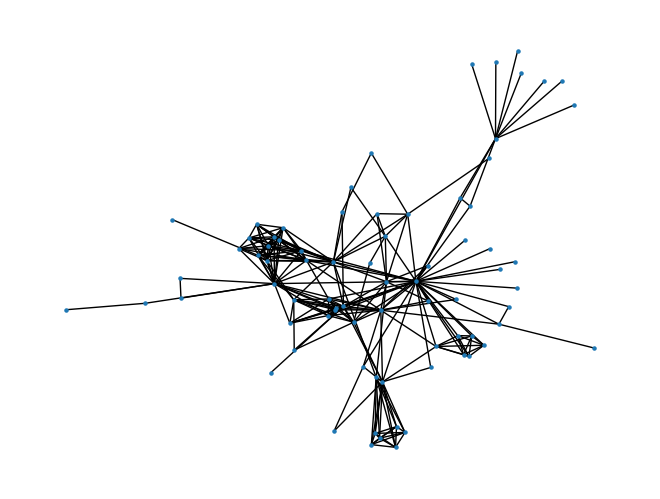

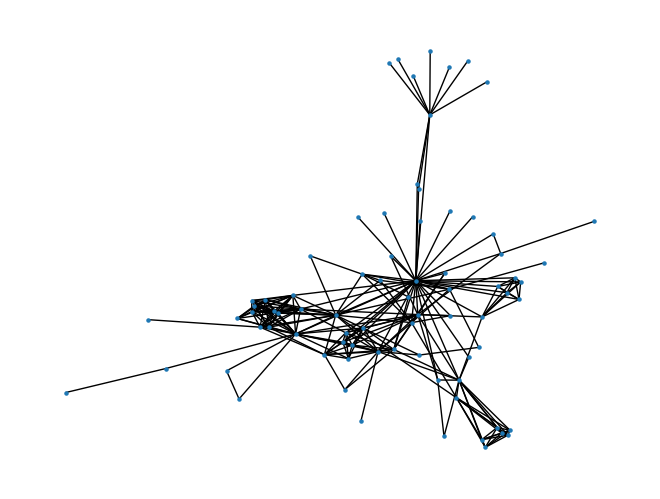

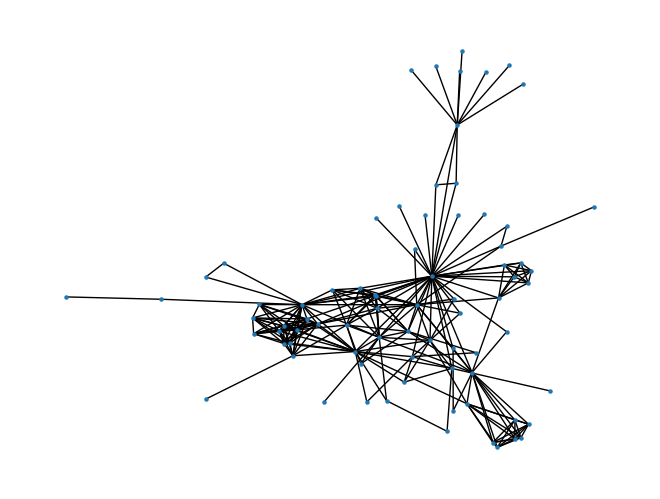

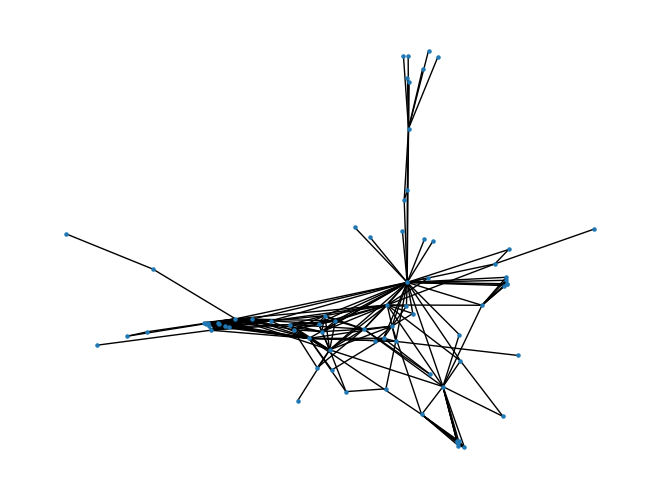

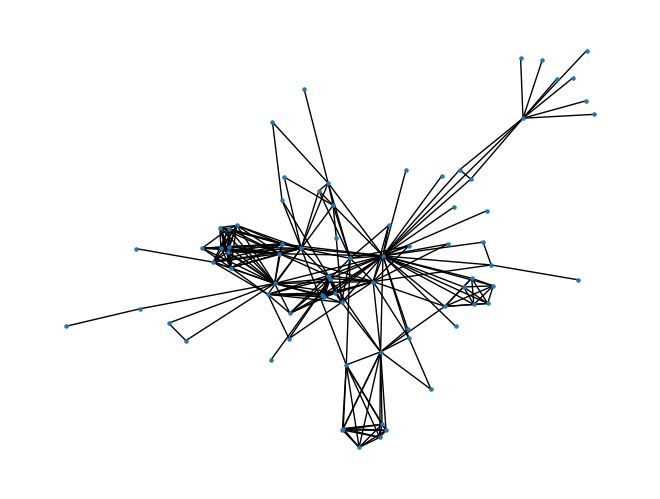

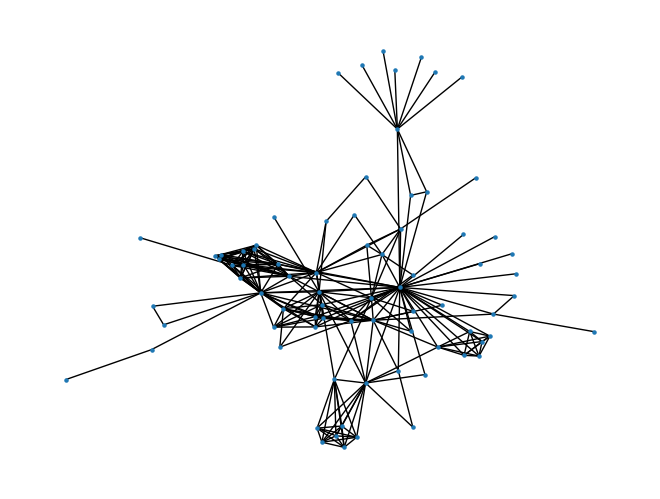

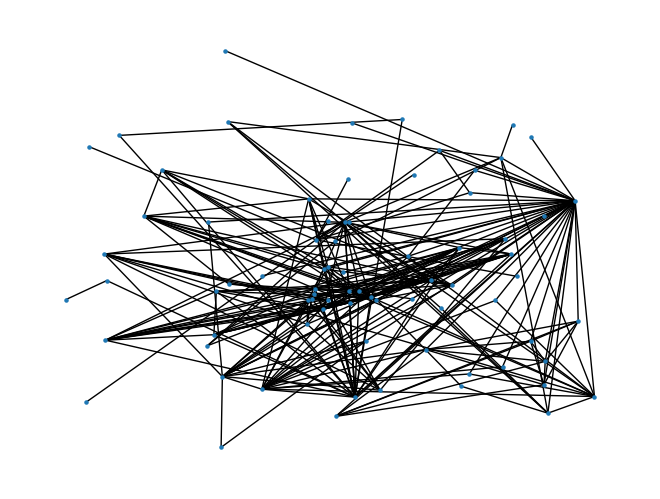

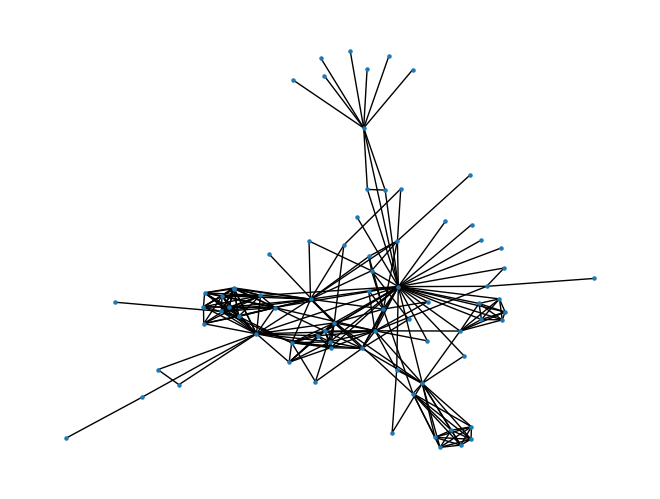

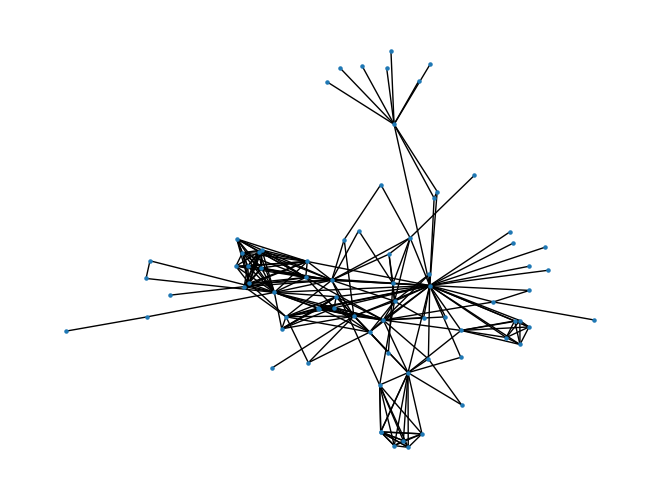

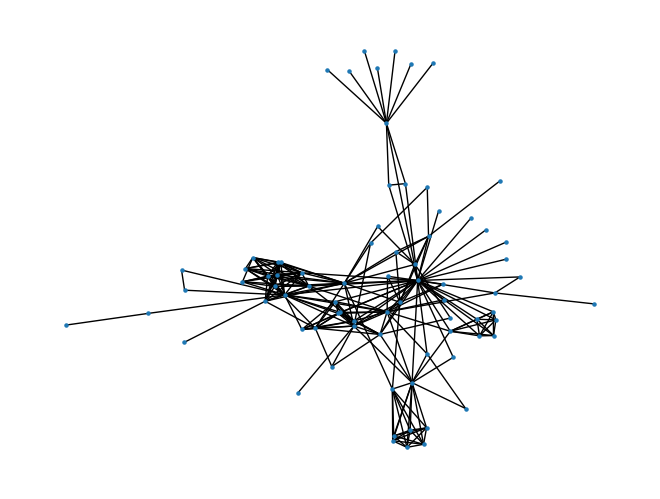

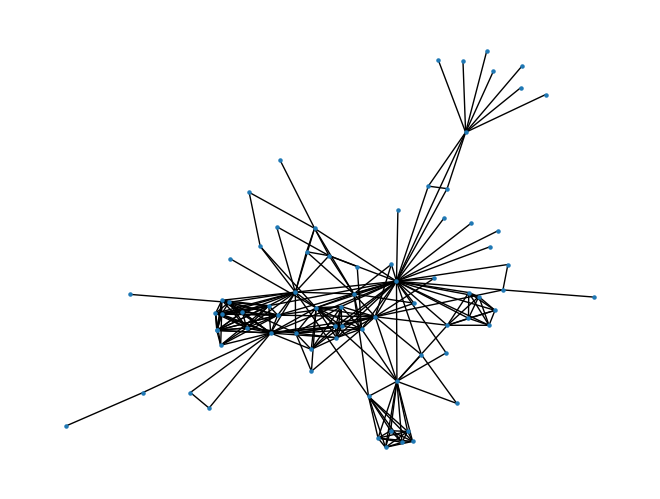

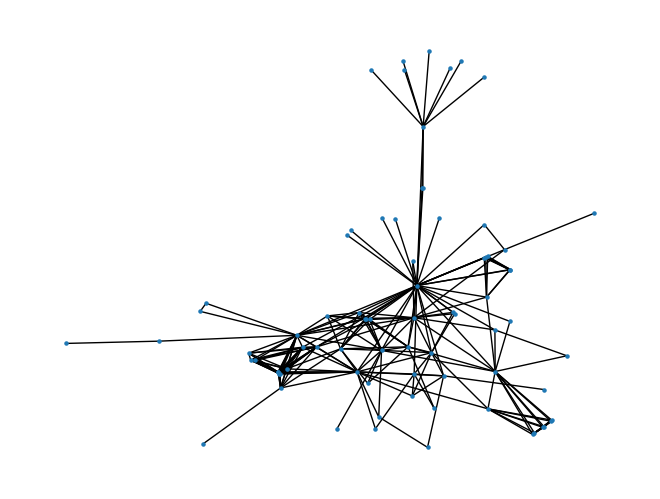

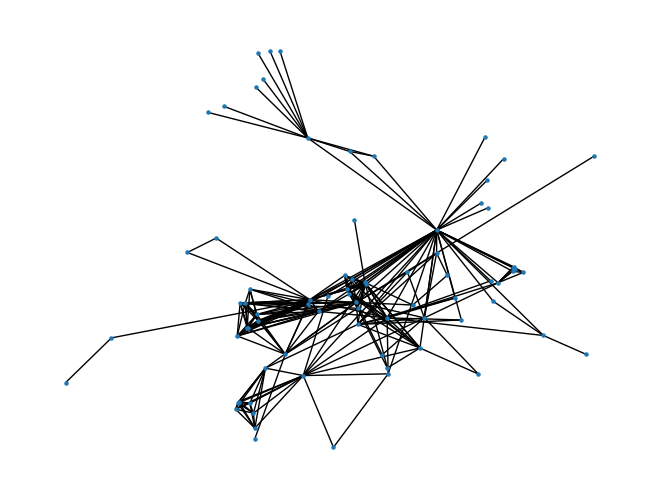

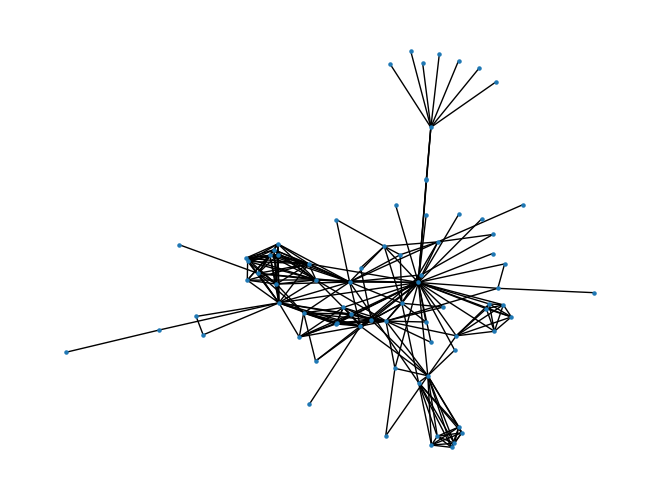

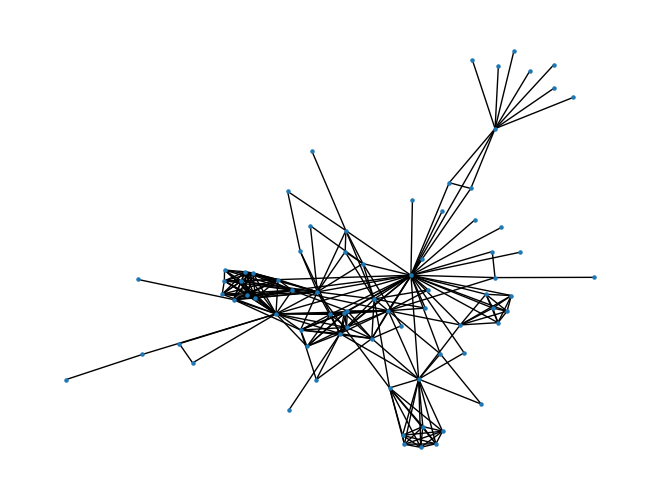

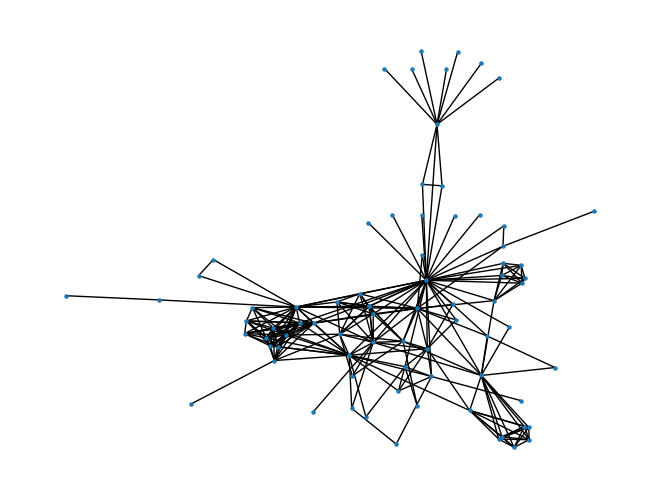

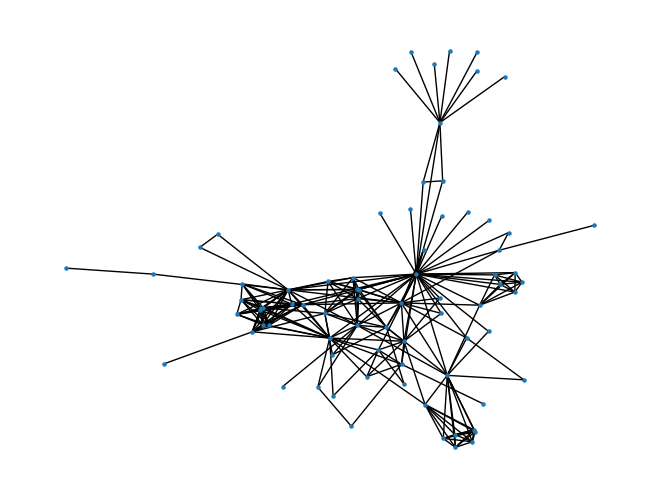

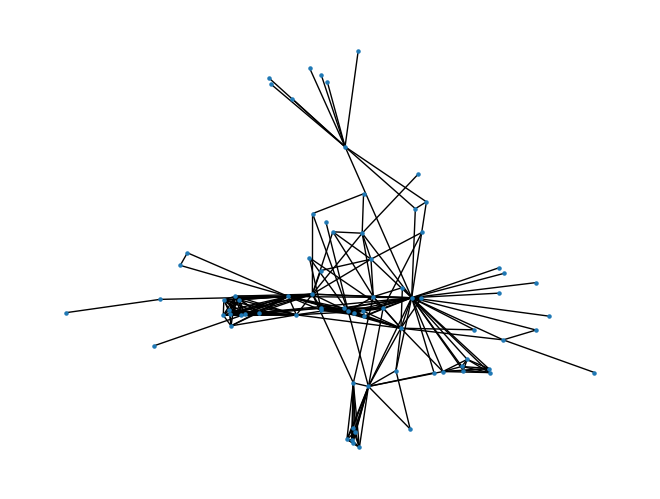

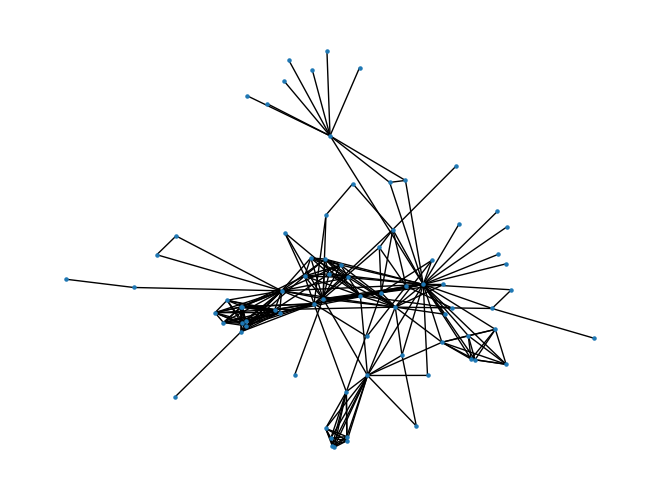

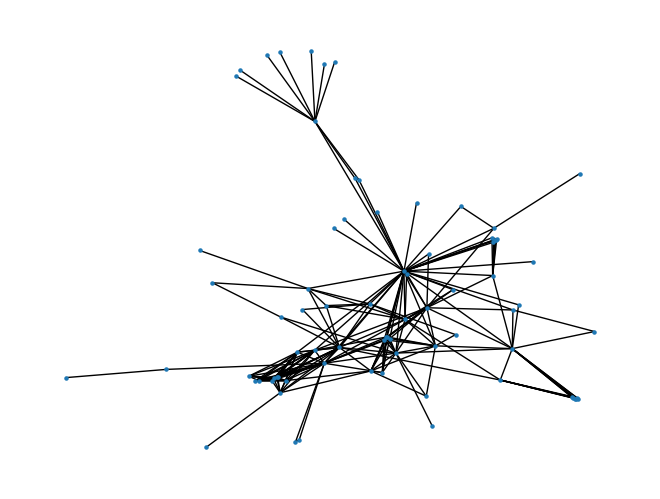

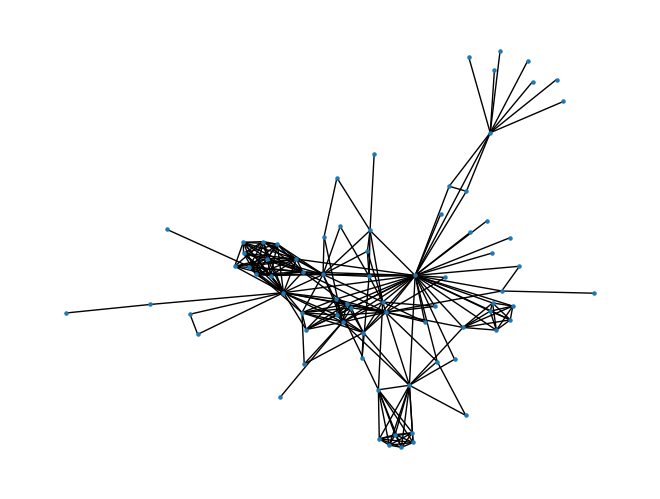

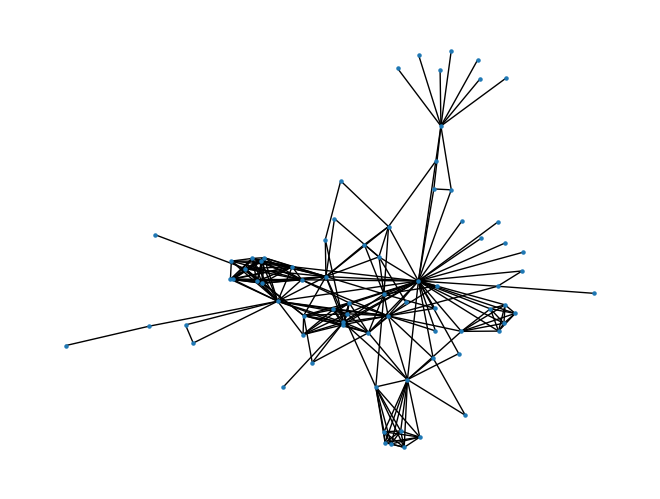

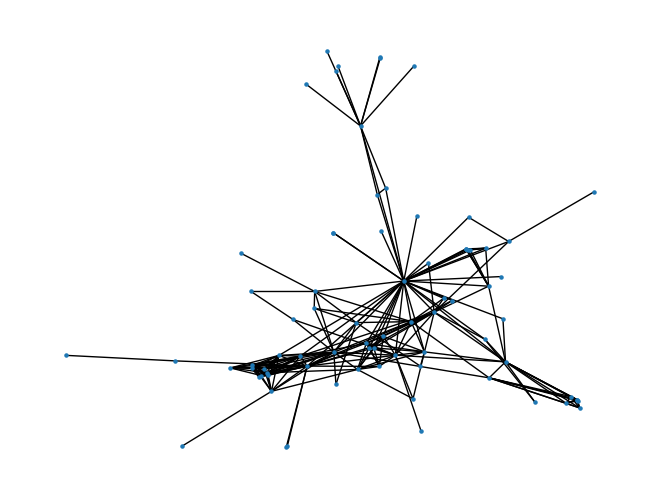

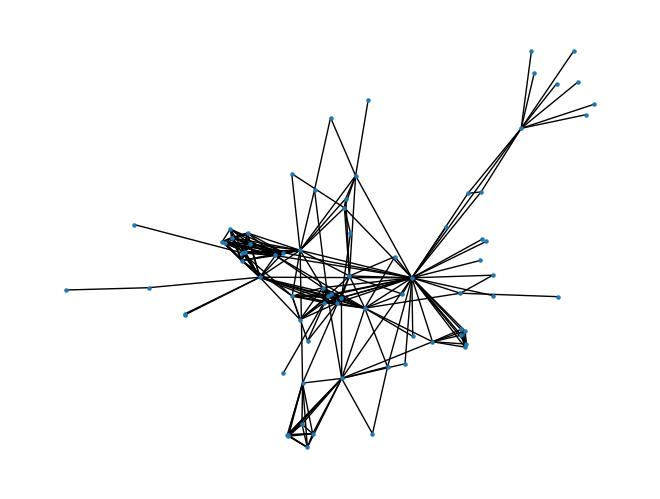

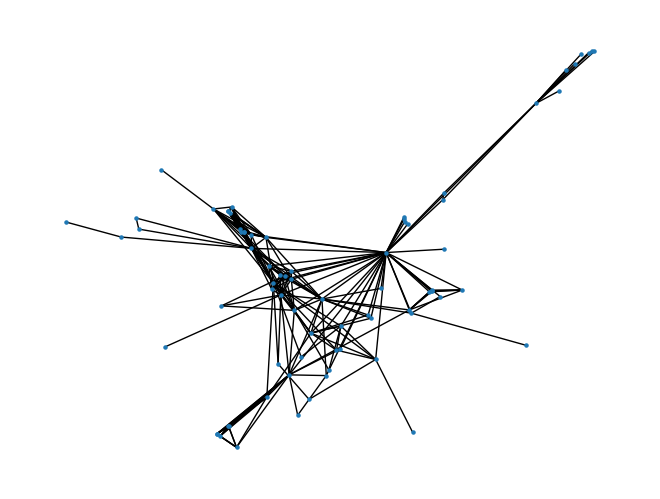

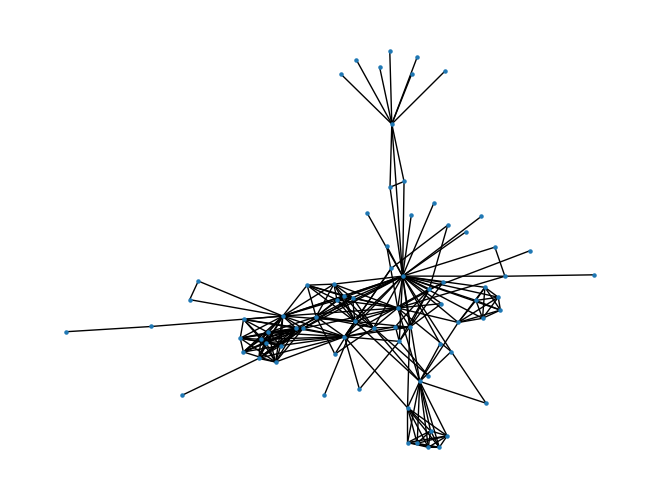

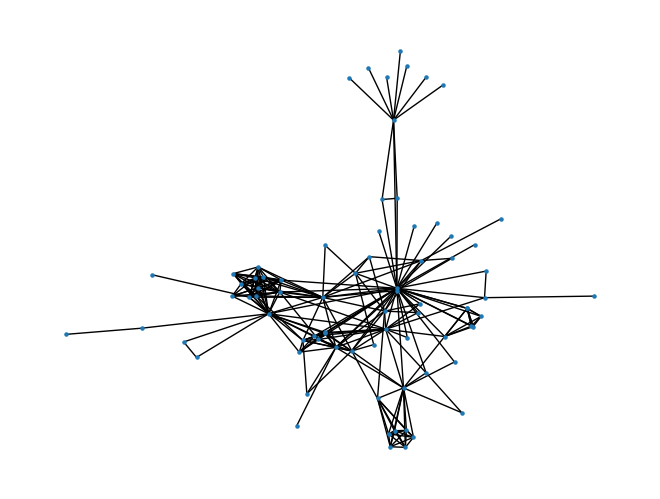

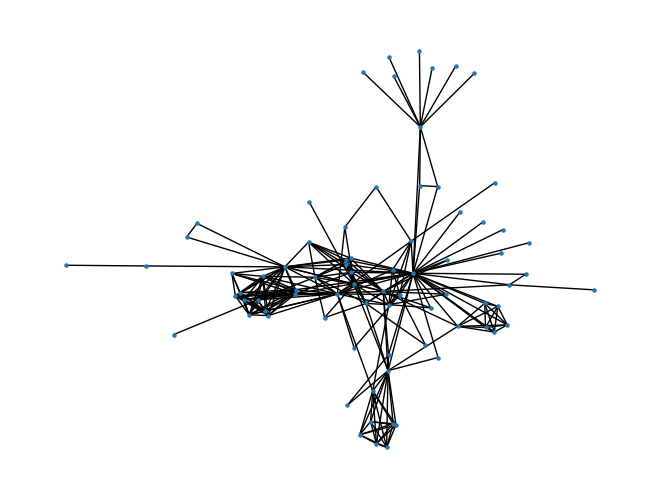

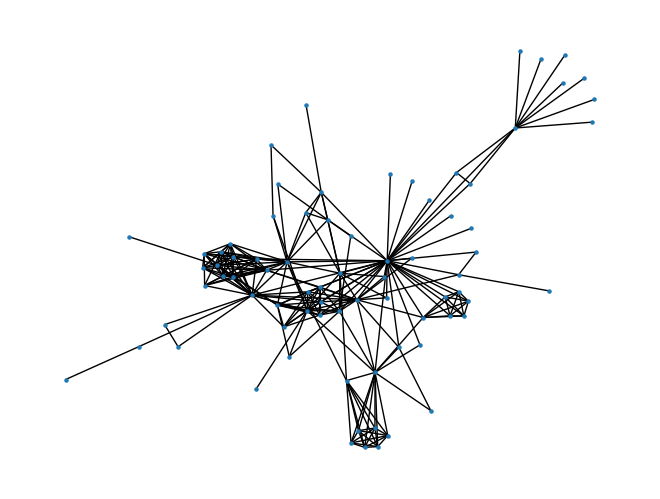

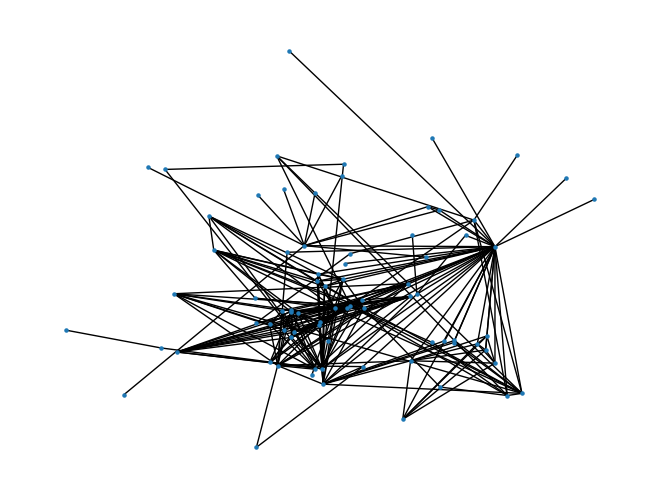

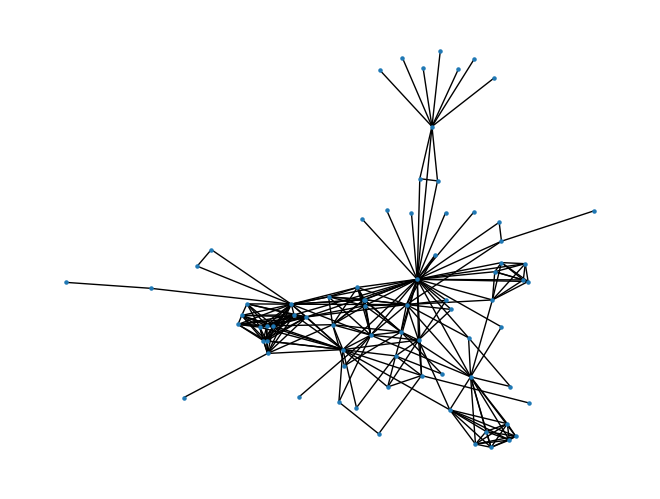

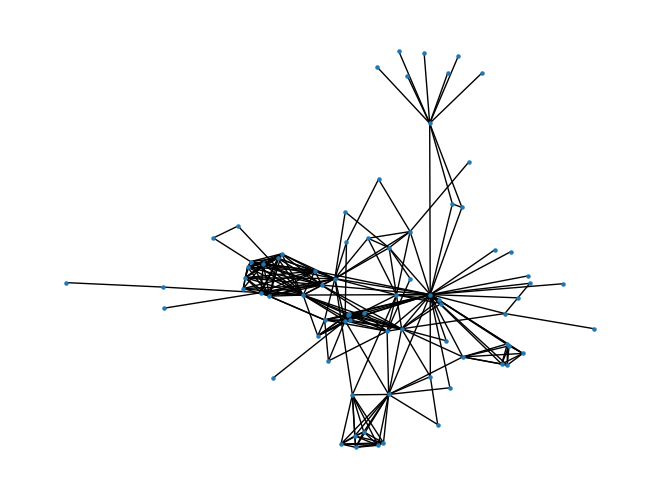

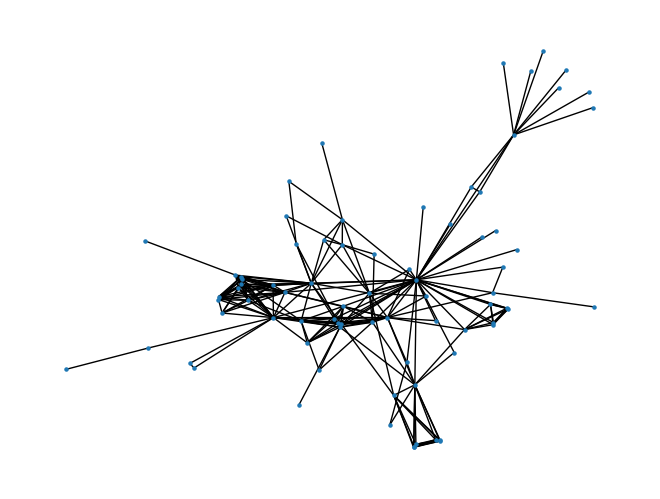

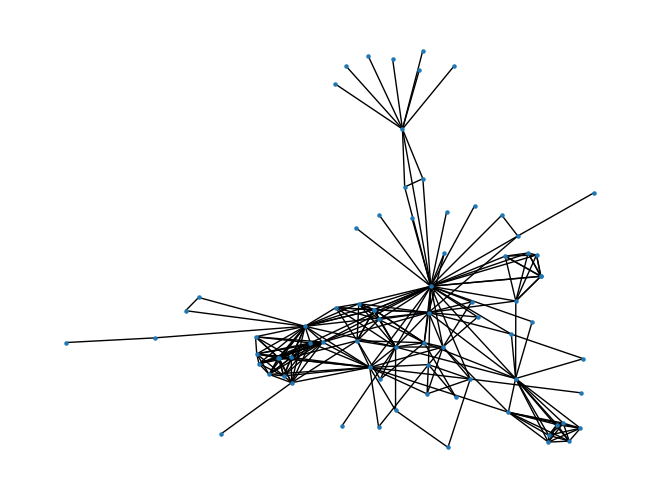

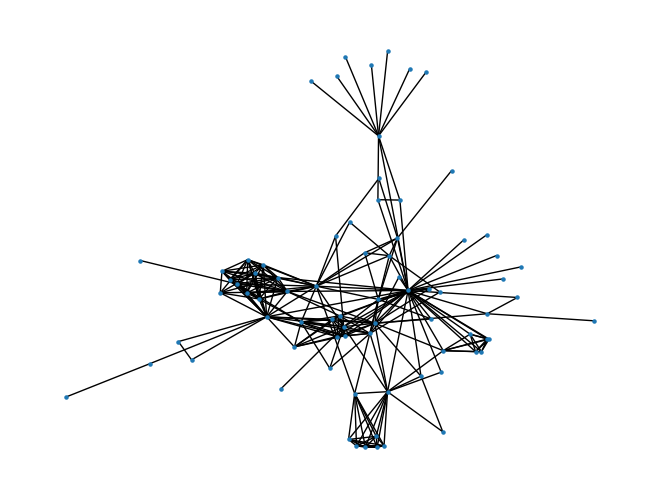

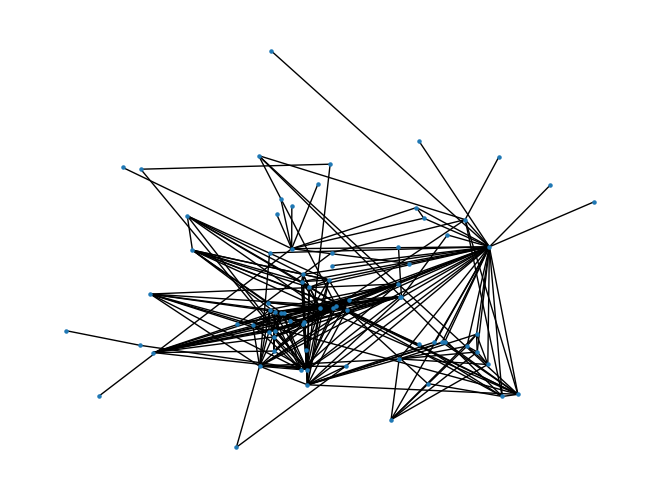

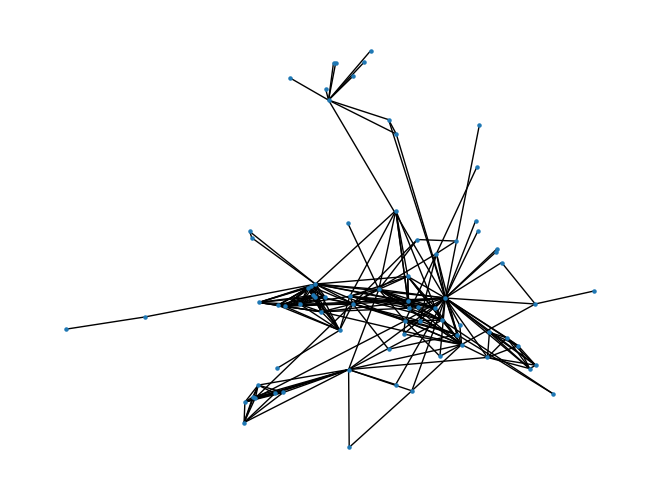

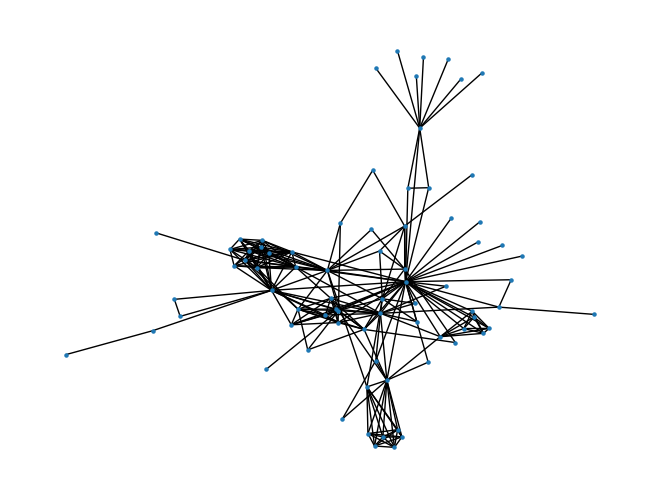

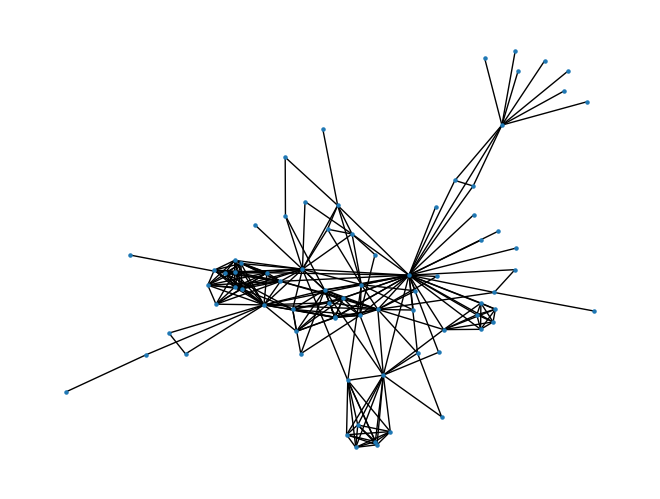

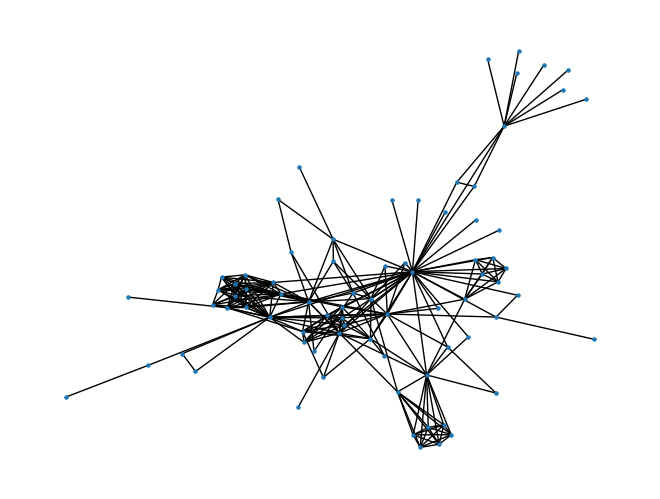

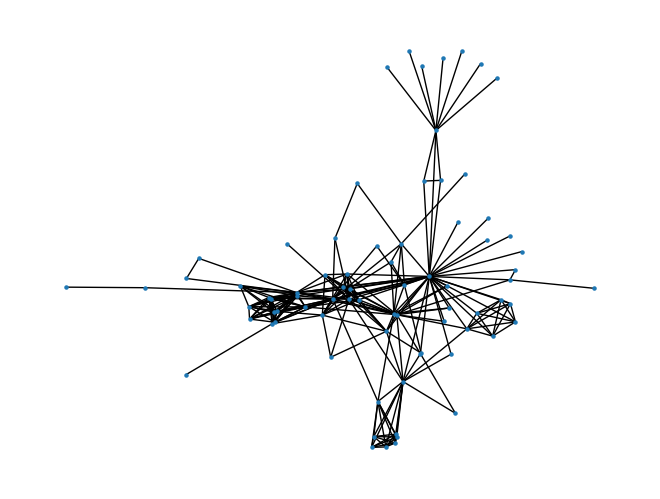

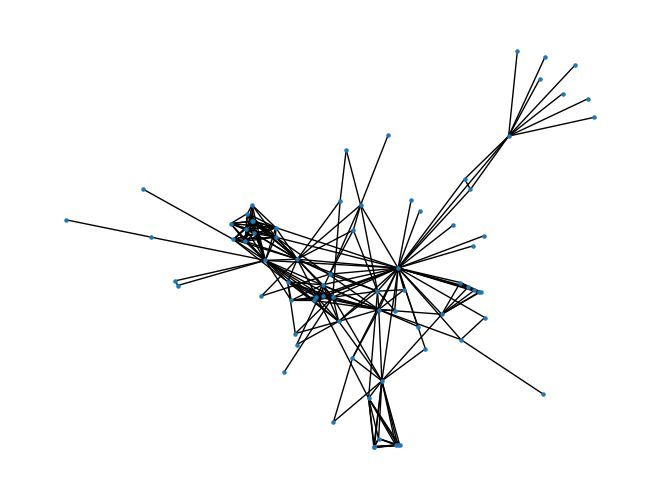

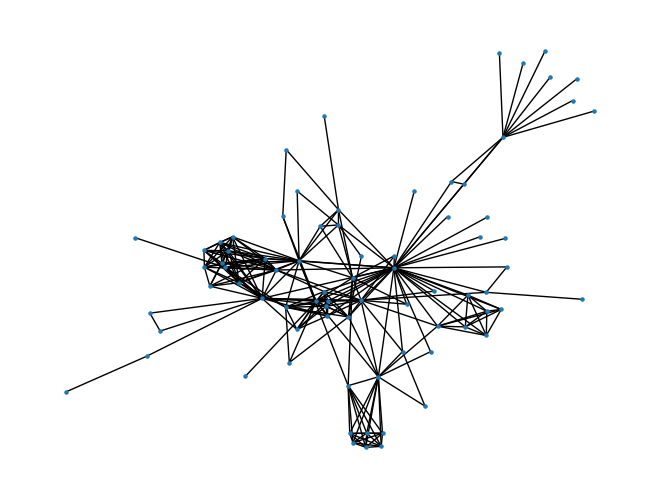

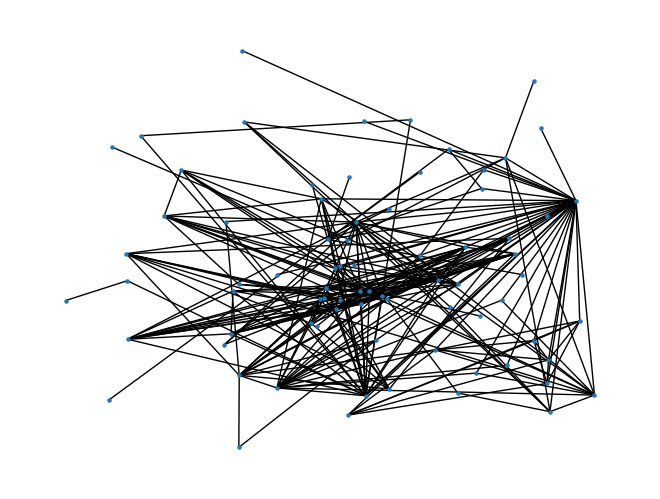

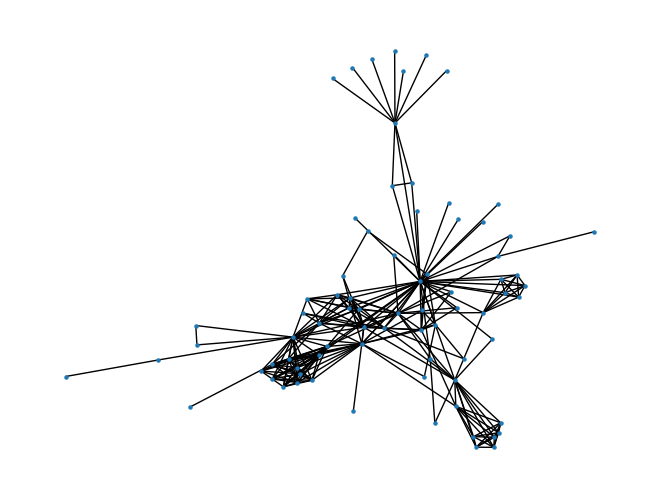

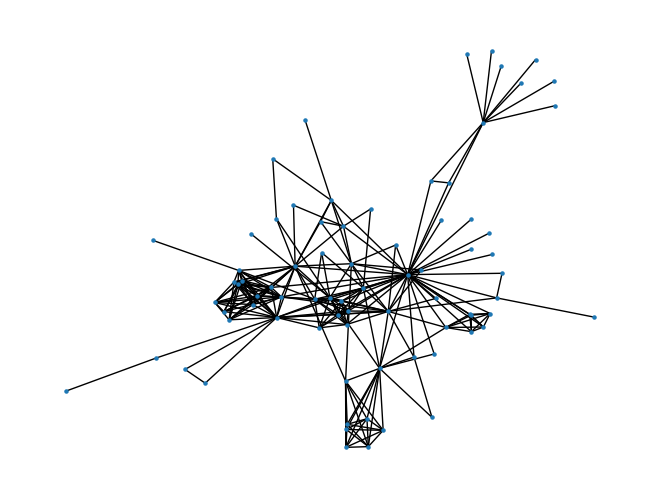

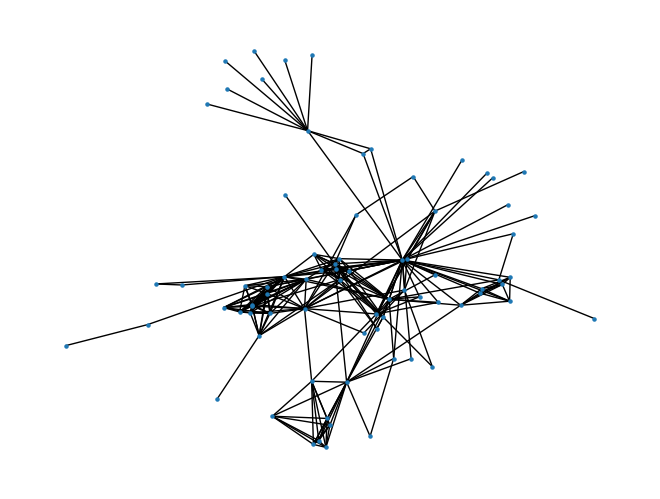

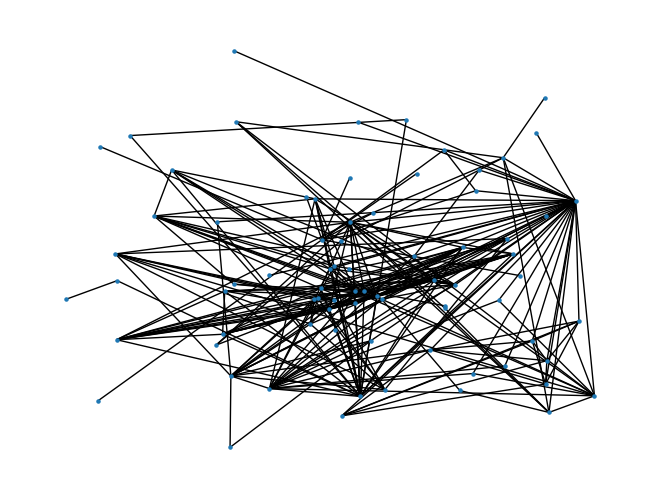

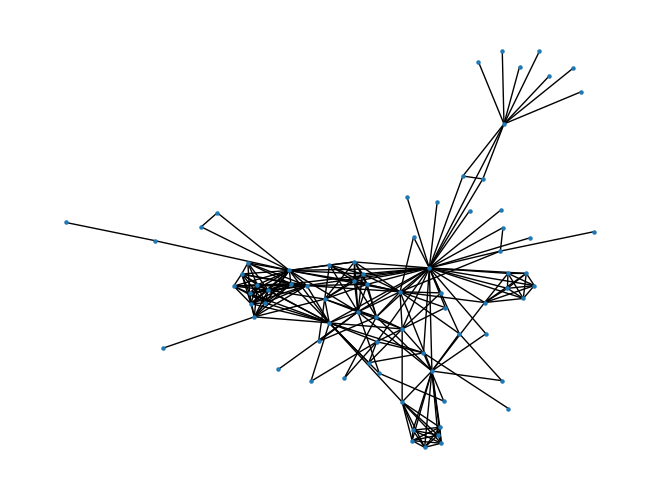

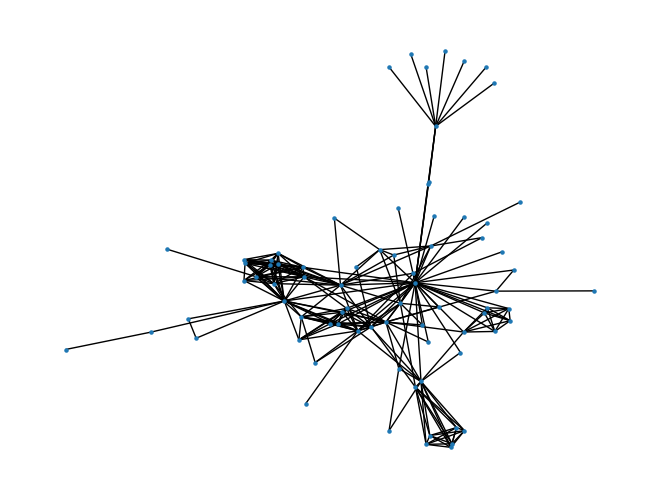

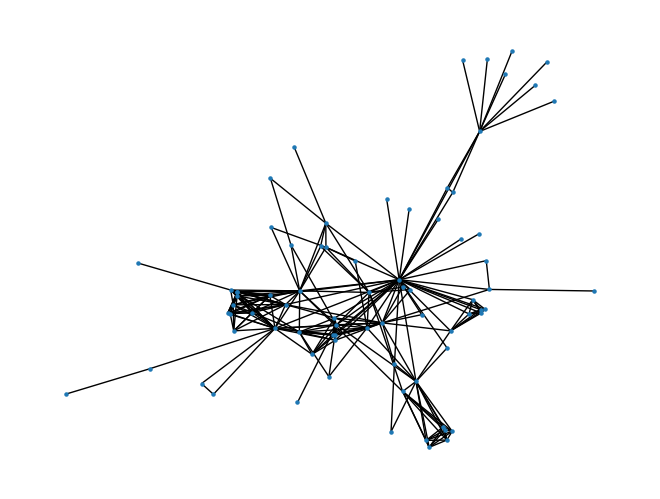

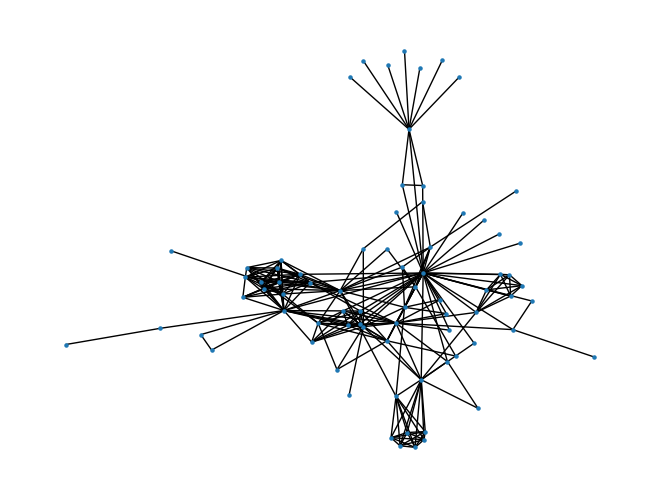

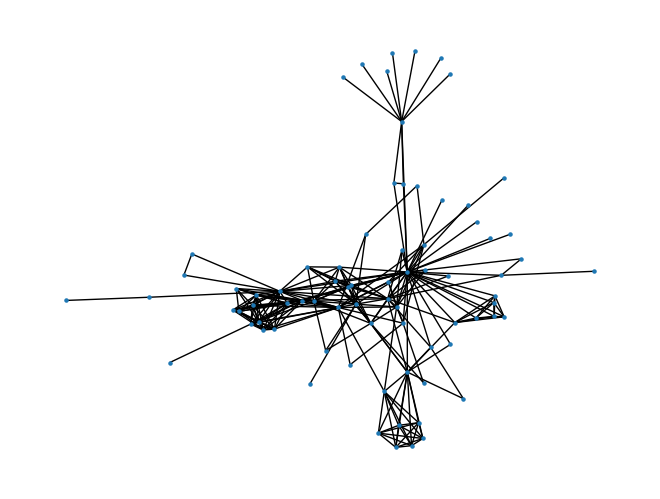

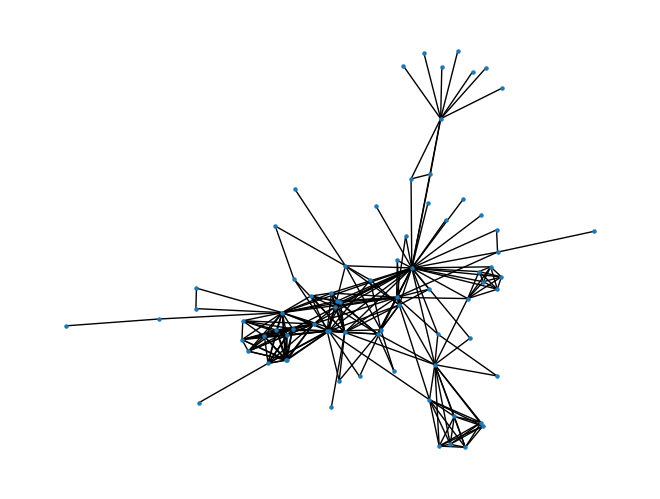

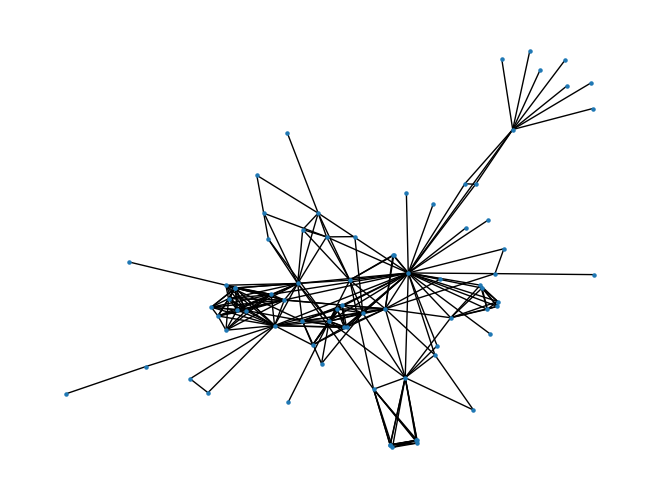

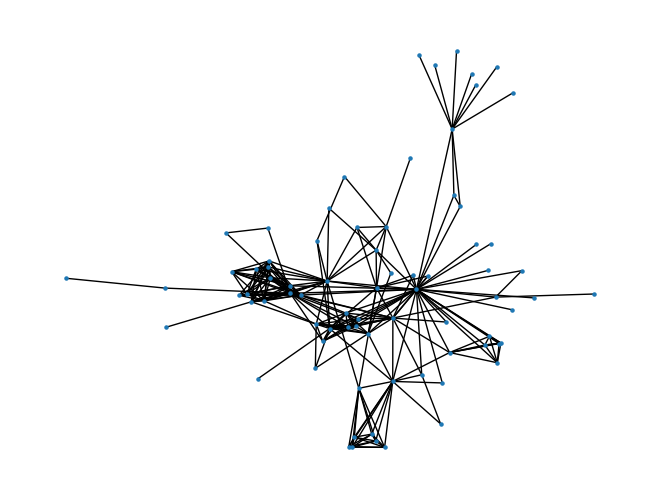

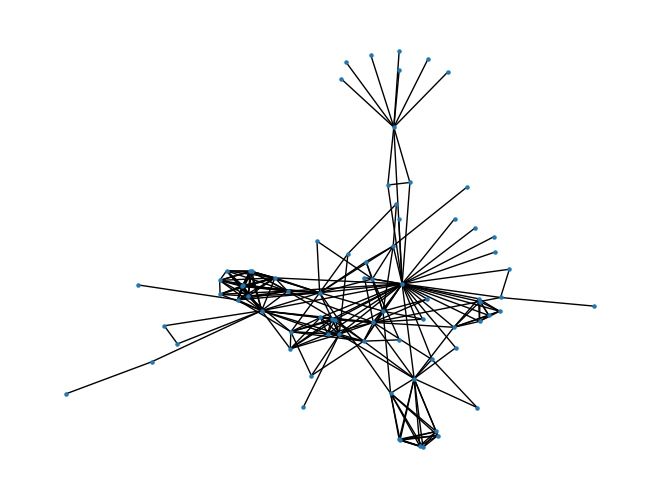

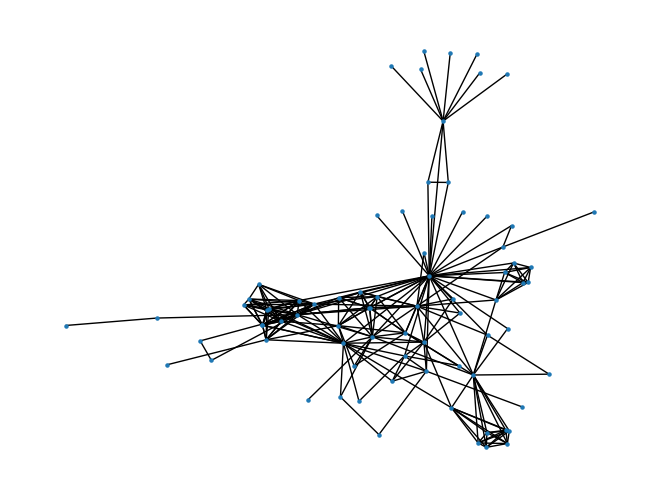

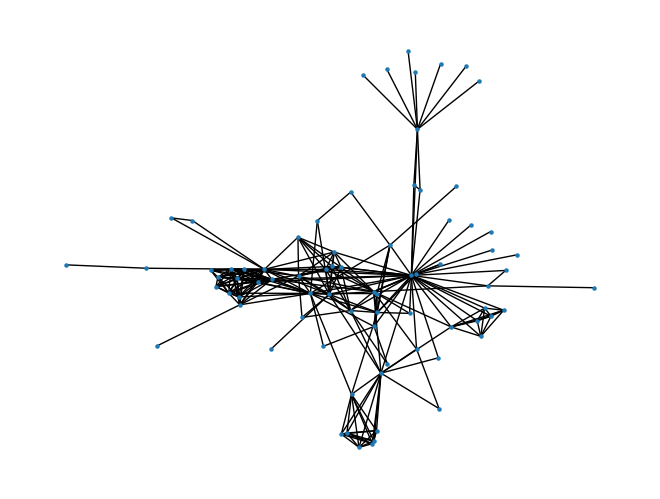

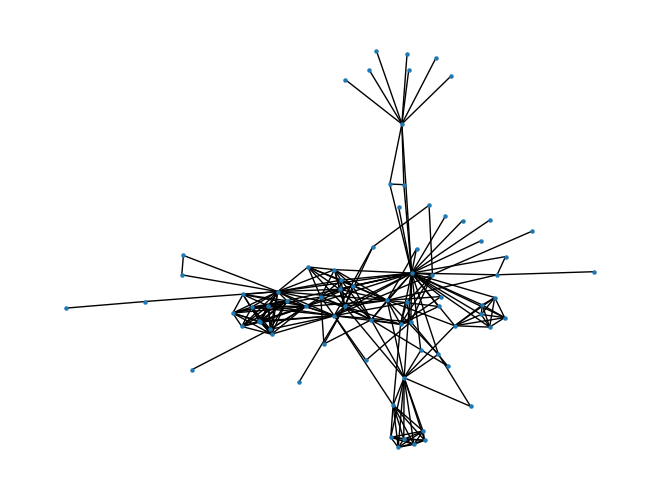

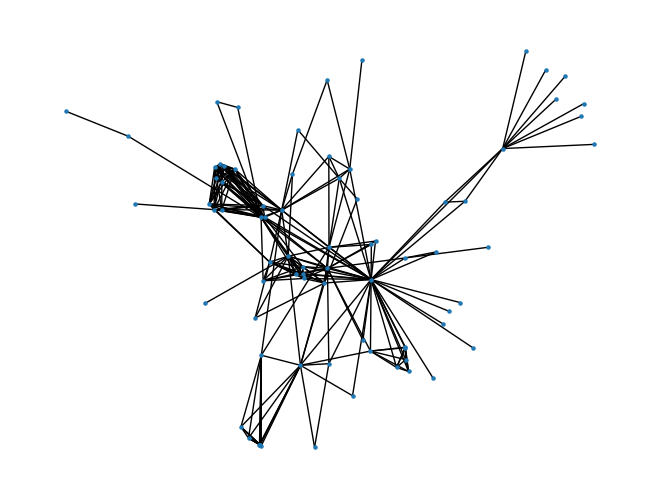

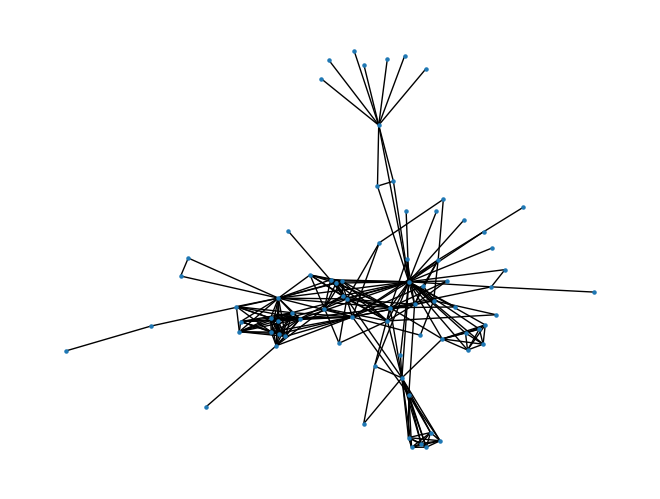

In [6]:
import matplotlib.pyplot as plt

# c = 0
print(len(best_trials))

for best_trial in best_trials:
    # print(best_trial.user_attrs['params'])
    pos = best_trial.user_attrs['pos']
    quality_metrics = best_trial.user_attrs['quality_metrics']

    nx.draw(G=nx_graph, pos=pos, node_size=5)

    plt.show()


    # plt.figure(dpi=300, facecolor='white')
    # # plt.tick_params(labelbottom=True, bottom=False)
    # plt.subplots_adjust(wspace=0.5, hspace=0.3)
    # placement_i = 1
    # for key in ALL_QUALITY_METRICS_NAMES:
    #     plt.subplot(2, 5, placement_i)
    #     plt.title(key, fontsize=5, color='orange' if key in targets else 'black')
    #     plt.xticks(fontsize=5, rotation=-45)
    #     plt.yticks(fontsize=5)
    #     plt.boxplot(q[key],whis=float("inf"))
    #     plt.scatter(1, quality_metrics[key], s=5)
    #     placement_i += 1
    # plt.show()

    # c += 1
    # if 5 < c:
    #     break